# **CH05** 데이터 연결하기

## 03 데이터 연결 마무리

### **merge 메서드**

: 병합(특정 key를 기준으로, left/right 방향성o)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 특정 위치의 날씨 정보

person = pd.read_csv('../data/survey_person.csv')   # 관측한 사람 이름
site = pd.read_csv('../data/survey_site.csv')       # 관측 위치
visited = pd.read_csv('../data/survey_visited.csv') # 관측 날짜
survey = pd.read_csv('../data/survey_survey.csv')   # 날씨 정보

In [5]:
person

,ident,personal,family
0,dyer,William,Dyer
1,pb,Frank,Pabodie
2,lake,Anderson,Lake
3,roe,Valentina,Roerich
4,danforth,Frank,Danforth


In [6]:
site

,name,lat,long
0,DR-1,-49.85,-128.57
1,DR-3,-47.15,-126.72
2,MSK-4,-48.87,-123.40


In [8]:
visited

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,NaN
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


In [7]:
survey

,taken,person,quant,reading
0,619,dyer,rad,9.82
1,619,dyer,sal,0.13
2,622,dyer,rad,7.80
3,622,dyer,sal,0.09
4,734,pb,rad,8.41
5,734,lake,sal,0.05
6,734,pb,temp,-21.50
7,735,pb,rad,7.22
8,735,NaN,sal,0.06
9,735,NaN,temp,-26.00


In [9]:
visited_subset = visited.iloc[[0,2,6],]
visited_subset

,ident,site,dated
0,619,DR-1,1927-02-08
2,734,DR-3,1939-01-07
6,837,MSK-4,1932-01-14


**pd.merge()**

- left  : merge할 데이터 프레임
- ringt : merge할 데이터 프레임
- how   : merge 방식 지정(default=inner)
- on    : 병합 key 지정(named index or list)
        / merge할 기준이 되는  키 컬럼, 컬럼명이 동일할 경우
- left_on   : 왼쪽 데이터프레임의 키 컬럼 설정
- right_o   : 오른쪽 데이터프레임의 키 컬럼 설정
- left_index: True일 경우, 왼쪽 데이터프레임 인덱스를 키로 사용
- right inde: True일 경우, 오른쪽 데이터프레임 인덱스를 키로 사용
- sort      : T/F, merge된 후 데이터프레임을 조인 키 기준으로 정렬
- indicator : False, 병합 후 출처를 명시

=> return DataFrame

In [ ]:
#pd.merge?

In [4]:
# site, visited_subset merge

o2o_merge = site.merge(
    visited_subset, 
    left_on='name', 
    right_on='site'
)

o2o_merge

,name,lat,long,ident,site,dated
0,DR-1,-49.85,-128.57,619,DR-1,1927-02-08
1,DR-3,-47.15,-126.72,734,DR-3,1939-01-07
2,MSK-4,-48.87,-123.40,837,MSK-4,1932-01-14


In [20]:
site, visited

(    name    lat    long
 0   DR-1 -49.85 -128.57
 1   DR-3 -47.15 -126.72
 2  MSK-4 -48.87 -123.40,
    ident   site       dated
 0    619   DR-1  1927-02-08
 1    622   DR-1  1927-02-10
 2    734   DR-3  1939-01-07
 3    735   DR-3  1930-01-12
 4    751   DR-3  1930-02-26
 5    752   DR-3         NaN
 6    837  MSK-4  1932-01-14
 7    844   DR-1  1932-03-22)

In [16]:
# site, visited merge

site.merge(
    visited,
    left_on='name',
    right_on='site'
)

,name,lat,long,ident,site,dated
0,DR-1,-49.85,-128.57,619,DR-1,1927-02-08
1,DR-1,-49.85,-128.57,622,DR-1,1927-02-10
2,DR-1,-49.85,-128.57,844,DR-1,1932-03-22
3,DR-3,-47.15,-126.72,734,DR-3,1939-01-07
4,DR-3,-47.15,-126.72,735,DR-3,1930-01-12
5,DR-3,-47.15,-126.72,751,DR-3,1930-02-26
6,DR-3,-47.15,-126.72,752,DR-3,NaN
7,MSK-4,-48.87,-123.40,837,MSK-4,1932-01-14


In [25]:
person.shape, survey.shape

((5, 3), (21, 4))

In [22]:
# person, survey merge

ps = person.merge(
    survey, 
    left_on='ident',
    right_on='person'
)
ps

,ident,personal,family,taken,person,quant,reading
0,dyer,William,Dyer,619,dyer,rad,9.82
1,dyer,William,Dyer,619,dyer,sal,0.13
2,dyer,William,Dyer,622,dyer,rad,7.80
3,dyer,William,Dyer,622,dyer,sal,0.09
4,pb,Frank,Pabodie,734,pb,rad,8.41
5,pb,Frank,Pabodie,734,pb,temp,-21.50
6,pb,Frank,Pabodie,735,pb,rad,7.22
7,pb,Frank,Pabodie,751,pb,rad,4.35
8,pb,Frank,Pabodie,751,pb,temp,-18.50
9,lake,Anderson,Lake,734,lake,sal,0.05


In [26]:
visited.shape, survey.shape

((8, 3), (21, 4))

In [24]:
# visited, survey merge

vs = visited.merge(
    survey,
    left_on='ident',
    right_on='taken'
)
vs

,ident,site,dated,taken,person,quant,reading
0,619,DR-1,1927-02-08,619,dyer,rad,9.82
1,619,DR-1,1927-02-08,619,dyer,sal,0.13
2,622,DR-1,1927-02-10,622,dyer,rad,7.80
3,622,DR-1,1927-02-10,622,dyer,sal,0.09
4,734,DR-3,1939-01-07,734,pb,rad,8.41
5,734,DR-3,1939-01-07,734,lake,sal,0.05
6,734,DR-3,1939-01-07,734,pb,temp,-21.50
7,735,DR-3,1930-01-12,735,pb,rad,7.22
8,735,DR-3,1930-01-12,735,NaN,sal,0.06
9,735,DR-3,1930-01-12,735,NaN,temp,-26.00


In [27]:
# ps, vs merge

ps_vs = ps.merge(
    vs,
    left_on=['ident','taken','quant','reading'],
    right_on=['person','ident','quant','reading']
)

In [28]:
ps_vs.iloc[0,]

ident_x           dyer
personal       William
family            Dyer
taken_x            619
person_x          dyer
quant              rad
reading           9.82
ident_y            619
site              DR-1
dated       1927-02-08
taken_y            619
person_y          dyer
Name: 0, dtype: object

---

# **CH06** 누락값 처리하기

- 선형대수 : numpy
- 수학/과학 : scipy
- 통계 : statsmodels or scikit learn

In [30]:
# 누락값 사용을 위해서는 numpy 필요

from numpy import NaN, NAN, nan

In [33]:
print(NaN == True)
print(NaN == False)
print(NaN == 0)
print(NaN == '')
print(NaN == NaN)

False
False
False
False
False


In [34]:
# 누락값이니?
pd.isnull(NaN)

True

In [35]:
# 누락값이 아니니?
print(pd.notnull(NaN))
print(pd.notnull(21))

False
True


### 누락값이 생기는 이유

In [36]:
# 누락값이 있는 데이터 집합을 연결할 때

visited, survey

(   ident   site       dated
 0    619   DR-1  1927-02-08
 1    622   DR-1  1927-02-10
 2    734   DR-3  1939-01-07
 3    735   DR-3  1930-01-12
 4    751   DR-3  1930-02-26
 5    752   DR-3         NaN
 6    837  MSK-4  1932-01-14
 7    844   DR-1  1932-03-22,
     taken person quant  reading
 0     619   dyer   rad     9.82
 1     619   dyer   sal     0.13
 2     622   dyer   rad     7.80
 3     622   dyer   sal     0.09
 4     734     pb   rad     8.41
 5     734   lake   sal     0.05
 6     734     pb  temp   -21.50
 7     735     pb   rad     7.22
 8     735    NaN   sal     0.06
 9     735    NaN  temp   -26.00
 10    751     pb   rad     4.35
 11    751     pb  temp   -18.50
 12    751   lake   sal     0.10
 13    752   lake   rad     2.19
 14    752   lake   sal     0.09
 15    752   lake  temp   -16.00
 16    752    roe   sal    41.60
 17    837   lake   rad     1.46
 18    837   lake   sal     0.21
 19    837    roe   sal    22.50
 20    844    roe   rad    11.25)

In [37]:
vs = visited.merge(
    survey,
    left_on='ident',
    right_on='taken'
)
vs

,ident,site,dated,taken,person,quant,reading
0,619,DR-1,1927-02-08,619,dyer,rad,9.82
1,619,DR-1,1927-02-08,619,dyer,sal,0.13
2,622,DR-1,1927-02-10,622,dyer,rad,7.80
3,622,DR-1,1927-02-10,622,dyer,sal,0.09
4,734,DR-3,1939-01-07,734,pb,rad,8.41
5,734,DR-3,1939-01-07,734,lake,sal,0.05
6,734,DR-3,1939-01-07,734,pb,temp,-21.50
7,735,DR-3,1930-01-12,735,pb,rad,7.22
8,735,DR-3,1930-01-12,735,NaN,sal,0.06
9,735,DR-3,1930-01-12,735,NaN,temp,-26.00


In [38]:
# 데이터를 입력할 때 누락값이 생기는 경우

num_legs = pd.Series({'goat':4, 'amoeba':nan})
num_legs

goat      4.0
amoeba    NaN
dtype: float64

In [39]:
# 범위를 지정하여 데이터를 추출할 때

gapminder = pd.read_csv('../data/gapminder.tsv',sep='\t')

In [40]:
life_exp = gapminder.groupby(['year'])['lifeExp'].mean()

In [41]:
life_exp

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [47]:
life_exp[life_exp.index > 2000] # NaN은 연산에서 제외

year
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

### 누락값의 개수

In [48]:
ebola = pd.read_csv('../data/country_timeseries.csv')

In [50]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [49]:
# 누락값이 아닌 값의 개수
ebola.count()

Date                   122
Day                    122
Cases_Guinea            93
Cases_Liberia           83
Cases_SierraLeone       87
Cases_Nigeria           38
Cases_Senegal           25
Cases_UnitedStates      18
Cases_Spain             16
Cases_Mali              12
Deaths_Guinea           92
Deaths_Liberia          81
Deaths_SierraLeone      87
Deaths_Nigeria          38
Deaths_Senegal          22
Deaths_UnitedStates     18
Deaths_Spain            16
Deaths_Mali             12
dtype: int64

In [51]:
# 전체 데이터 - 누락값이 아닌 값 = 누락값
num_rows = ebola.shape[0]
num_missing = num_rows - ebola.count()
num_missing

Date                     0
Day                      0
Cases_Guinea            29
Cases_Liberia           39
Cases_SierraLeone       35
Cases_Nigeria           84
Cases_Senegal           97
Cases_UnitedStates     104
Cases_Spain            106
Cases_Mali             110
Deaths_Guinea           30
Deaths_Liberia          41
Deaths_SierraLeone      35
Deaths_Nigeria          84
Deaths_Senegal         100
Deaths_UnitedStates    104
Deaths_Spain           106
Deaths_Mali            110
dtype: int64


boolean형의 연산 : True = 1 / False = 0

In [57]:
ebola.isnull().sum()

Date                     0
Day                      0
Cases_Guinea            29
Cases_Liberia           39
Cases_SierraLeone       35
Cases_Nigeria           84
Cases_Senegal           97
Cases_UnitedStates     104
Cases_Spain            106
Cases_Mali             110
Deaths_Guinea           30
Deaths_Liberia          41
Deaths_SierraLeone      35
Deaths_Nigeria          84
Deaths_Senegal         100
Deaths_UnitedStates    104
Deaths_Spain           106
Deaths_Mali            110
dtype: int64

np.count_nonzero() : 배열에서 0이 아닌 값의 개수


In [52]:
# 전체 NaN의 총 개수
np.count_nonzero(ebola.isnull())

1214

In [53]:
np.count_nonzero(ebola['Cases_Guinea'].isnull())

29

Series.value_counts() : 시리즈내 값들의 빈도(개수)

In [58]:
#                                 NaN 포함
ebola.Cases_Guinea.value_counts(dropna=False).head()

Cases_Guinea
NaN      29
86.0      3
495.0     2
112.0     2
390.0     2
Name: count, dtype: int64

## 누락값(결측치) 처리하기

### 1. 누락값 **변경**하기

: ***fillna()***

In [59]:
ebola.fillna(0).iloc[0:10,0:5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,0.0,10030.0
1,1/4/2015,288,2775.0,0.0,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,0.0,8157.0,0.0
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
6,12/27/2014,280,2695.0,0.0,9409.0
7,12/24/2014,277,2630.0,7977.0,9203.0
8,12/21/2014,273,2597.0,0.0,9004.0
9,12/20/2014,272,2571.0,7862.0,8939.0


***fillna(method='ffill')***

:forward fill

In [60]:
ebola.fillna(method='ffill').iloc[0:10,0:5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,NaN,10030.0
1,1/4/2015,288,2775.0,NaN,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,2769.0,8157.0,9722.0
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
6,12/27/2014,280,2695.0,8018.0,9409.0
7,12/24/2014,277,2630.0,7977.0,9203.0
8,12/21/2014,273,2597.0,7977.0,9004.0
9,12/20/2014,272,2571.0,7862.0,8939.0


***fillna(method='bfill')***

: back fill

In [61]:
ebola.fillna(method='bfill').iloc[0:10,0:5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,8166.0,10030.0
1,1/4/2015,288,2775.0,8166.0,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,2730.0,8157.0,9633.0
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
6,12/27/2014,280,2695.0,7977.0,9409.0
7,12/24/2014,277,2630.0,7977.0,9203.0
8,12/21/2014,273,2597.0,7862.0,9004.0
9,12/20/2014,272,2571.0,7862.0,8939.0


***interpolate()***

: 양쪽의 중간값으로 채움

In [62]:
ebola.interpolate().iloc[0:10,0:5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,NaN,10030.0
1,1/4/2015,288,2775.0,NaN,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,2749.5,8157.0,9677.5
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
6,12/27/2014,280,2695.0,7997.5,9409.0
7,12/24/2014,277,2630.0,7977.0,9203.0
8,12/21/2014,273,2597.0,7919.5,9004.0
9,12/20/2014,272,2571.0,7862.0,8939.0


### 2. 누락값 **삭제**하기

In [64]:
ebola.shape

(122, 18)

In [65]:
ebola.dropna().shape

(1, 18)

In [ ]:
#!pip install missingno

In [68]:
import missingno as msno

<Axes: >

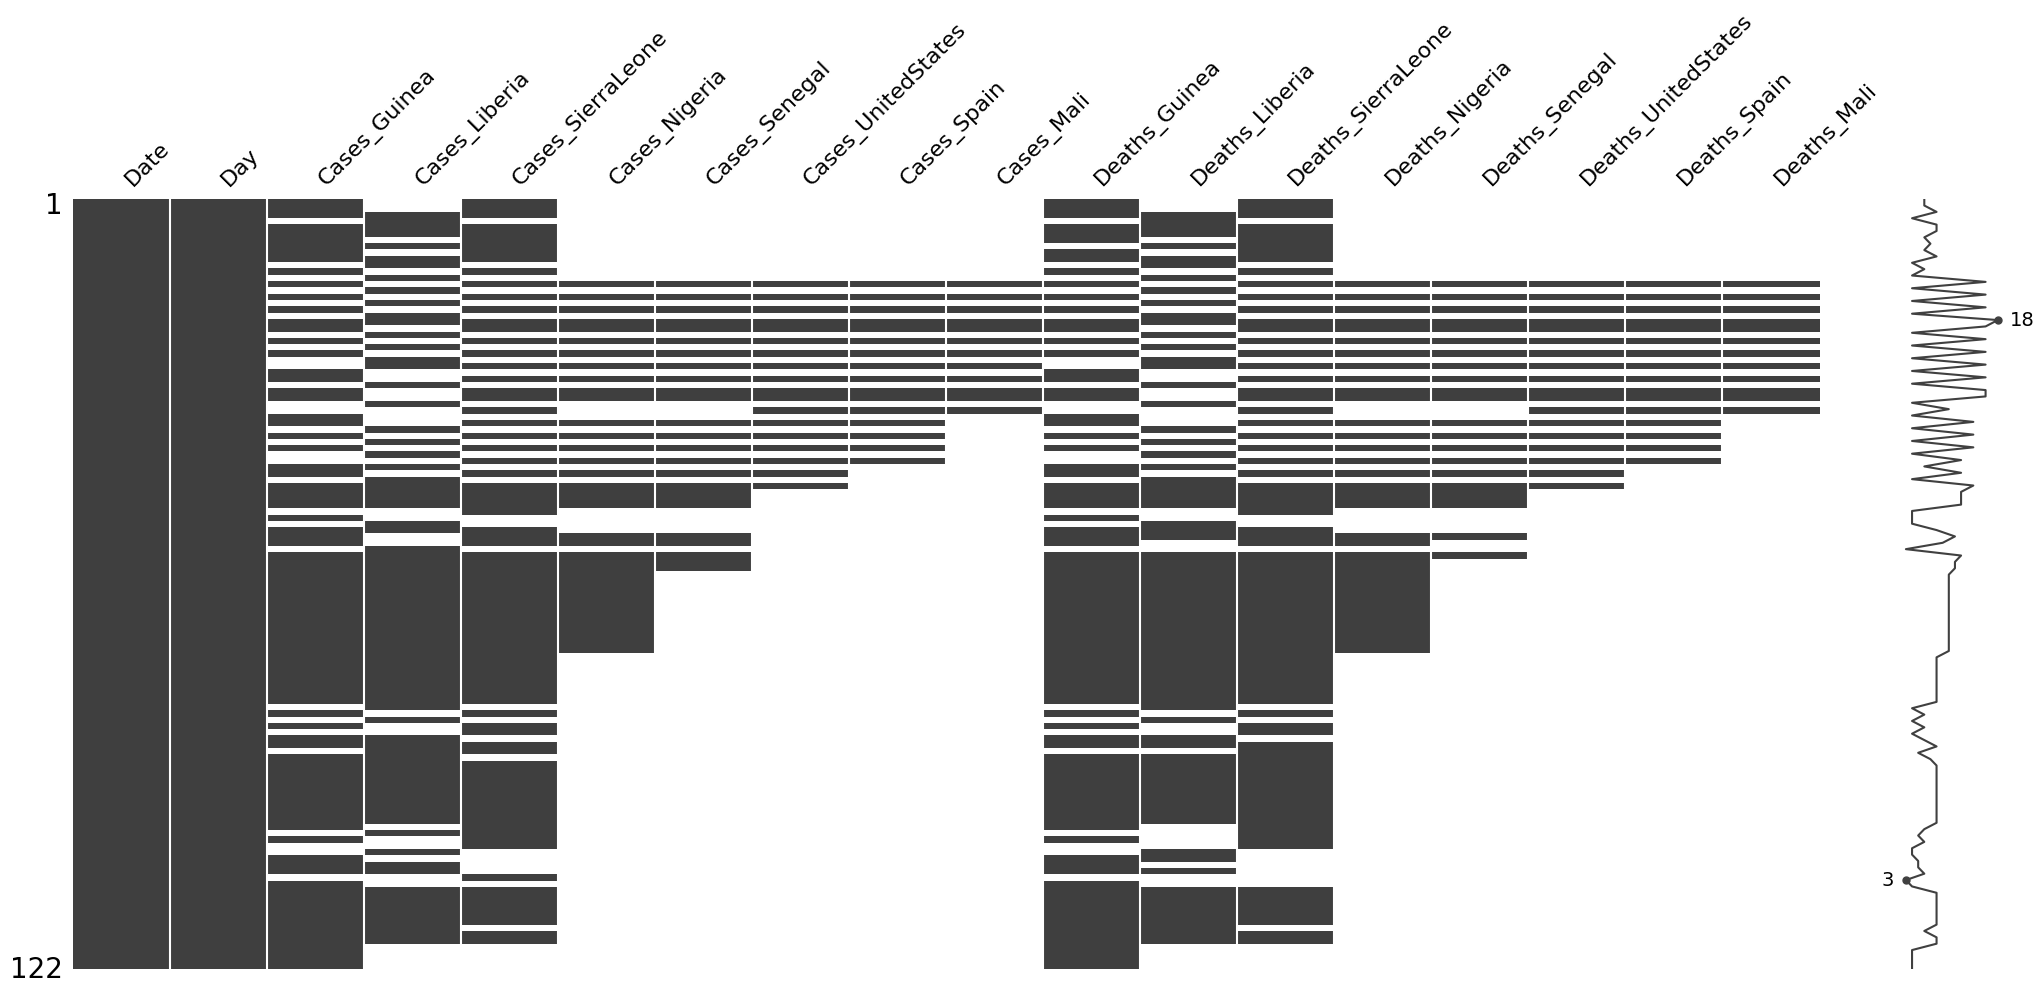

In [69]:
msno.matrix(ebola)

## 결측치 유형

1. **MCAR** (Missing Completely at Randomm)

        : 다른 변수와 관련 없는 결측치 발생 => 데이터 누락

2. **MAR** (Missing at Random)

        : 특정 변수와 관련있으나 결과와는 상관 없는 결측치 발생 => 상관관계X


3. **MNAR** (Missing Not at Random)

        : 결과와 상관 관계가 있는 결측치 발생

## 누락값이 포함된 데이터 계산(연산)하기

In [70]:
ebola['Cases_multiple'] = ebola['Cases_Guinea'] + ebola['Cases_Liberia'] + ebola['Cases_SierraLeone']

In [72]:
ebola_subset = ebola.loc[:,['Cases_Guinea','Cases_Liberia','Cases_SierraLeone','Cases_multiple']]
ebola_subset.head()

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_multiple
0,2776.0,NaN,10030.0,NaN
1,2775.0,NaN,9780.0,NaN
2,2769.0,8166.0,9722.0,20657.0
3,NaN,8157.0,NaN,NaN
4,2730.0,8115.0,9633.0,20478.0


In [73]:
ebola.Cases_Guinea.sum(skipna=True)

84729.0

In [74]:
ebola.Cases_Guinea.sum(skipna=False)

nan

---

# **CH07** 깔끔한 데이터

## 1. 열과 피벗

### ***melt() 메서드***

: 지정한 컬럼(열)을 행으로 정리

- id_vars       :   위치를 그래도 유지할 열의 이름 지정
- value_vars    :   행으로 위치를 변경할 열의 이름 지정
- var_name
- value_name

In [75]:
# 종교별 소득

pew = pd.read_csv('../data/pew.csv')
pew.head()

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116


In [79]:
pew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   religion            18 non-null     object
 1   <$10k               18 non-null     int64 
 2   $10-20k             18 non-null     int64 
 3   $20-30k             18 non-null     int64 
 4   $30-40k             18 non-null     int64 
 5   $40-50k             18 non-null     int64 
 6   $50-75k             18 non-null     int64 
 7   $75-100k            18 non-null     int64 
 8   $100-150k           18 non-null     int64 
 9   >150k               18 non-null     int64 
 10  Don't know/refused  18 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 1.7+ KB


In [80]:
pew.describe()

,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,107.222222,154.500000,186.500000,183.444444,171.388889,288.055556,221.666667,177.611111,144.888889,340.055556
std,168.931784,255.172433,309.891869,291.470354,271.144446,458.442436,345.078849,275.679724,205.224952,530.523878
min,1.000000,2.000000,3.000000,4.000000,2.000000,7.000000,3.000000,4.000000,4.000000,8.000000
25%,12.250000,14.750000,17.000000,15.750000,15.000000,34.250000,25.250000,22.500000,23.750000,41.250000
50%,20.000000,27.000000,33.500000,40.000000,34.000000,66.500000,65.500000,48.500000,53.500000,74.500000
75%,170.000000,193.000000,192.000000,198.750000,166.750000,201.500000,128.750000,103.500000,134.250000,294.750000
max,575.000000,869.000000,1064.000000,982.000000,881.000000,1486.000000,949.000000,792.000000,634.000000,1529.000000


In [82]:
# 6개 컬럼 추출
pew.iloc[:,0:6]

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k
0,Agnostic,27,34,60,81,76
1,Atheist,12,27,37,52,35
2,Buddhist,27,21,30,34,33
3,Catholic,418,617,732,670,638
4,Don’t know/refused,15,14,15,11,10
5,Evangelical Prot,575,869,1064,982,881
6,Hindu,1,9,7,9,11
7,Historically Black Prot,228,244,236,238,197
8,Jehovah's Witness,20,27,24,24,21
9,Jewish,19,19,25,25,30


#### 1) 1개 열만 고정하고 나머지 열을 행으로 바꾸기

In [86]:
pew_long = pd.melt(pew, id_vars='religion')
pew_long

,religion,variable,value
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [89]:
# 열 이름 바꾸기

pew_long = pd.melt(pew, 
         id_vars='religion',
         var_name='income',
         value_name='count'
)
pew_long

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


#### 2) 2개 이상의 열을 고정하고 나머지 열을 행으로 바꾸기

In [90]:
billboard = pd.read_csv('../data/billboard.csv')
billboard.iloc[0:5,0:16]

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,wk6,wk7,wk8,wk9,wk10,wk11
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,94.0,99.0,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,57.0,54.0,53.0,51.0,51.0,51.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,65.0,55.0,59.0,62.0,61.0,61.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,31.0,36.0,49.0,53.0,57.0,64.0


In [94]:
billboard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 81 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          317 non-null    int64  
 1   artist        317 non-null    object 
 2   track         317 non-null    object 
 3   time          317 non-null    object 
 4   date.entered  317 non-null    object 
 5   wk1           317 non-null    int64  
 6   wk2           312 non-null    float64
 7   wk3           307 non-null    float64
 8   wk4           300 non-null    float64
 9   wk5           292 non-null    float64
 10  wk6           280 non-null    float64
 11  wk7           269 non-null    float64
 12  wk8           260 non-null    float64
 13  wk9           253 non-null    float64
 14  wk10          244 non-null    float64
 15  wk11          236 non-null    float64
 16  wk12          222 non-null    float64
 17  wk13          210 non-null    float64
 18  wk14          204 non-null    

In [96]:
billboard_long = pd.melt(billboard,
                        id_vars=['year','artist','track','time','date.entered'],
                        var_name='week',
                        value_name='rating'
)
billboard_long.head()

,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0


## 2. 열 이름 관리하기